In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats

#vizzing
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 

In [35]:
pwd

u'C:\\Users\\coreyjez\\Documents\\nyc16_ids3\\notebooks'

In [36]:
statcast = pd.read_csv("../data/statcast.csv")

In [37]:
statcast.head()

,year,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,...,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk,hit,fieldingTeam,row
0,2016,FF,274,2016-06-04,87.08,1.565,6.457,Bartolo Colon,112526,592593,...,275.70,108.36,9.76,84.80,1804.0,5.03,447701.0,1,MIA,1
1,2016,FT,193,2016-05-18,90.72,1.962,5.366,Bartolo Colon,112526,461829,...,144.31,73.99,-11.50,90.52,2141.0,6.12,447473.0,0,WSH,2
2,2016,FF,89,2016-05-07,90.73,-1.692,5.834,Bartolo Colon,112526,448306,...,364.74,96.89,34.86,91.38,2276.0,6.64,447317.0,1,SD,3
3,2016,FF,382,2016-05-02,91.53,-1.411,5.924,Bartolo Colon,112526,502032,...,NaN,NaN,NaN,90.95,2284.0,6.31,447244.0,0,ATL,4
4,2016,FF,285,2016-04-09,94.87,-2.133,5.489,Bartolo Colon,112526,592826,...,NaN,NaN,NaN,95.43,2205.0,6.69,446936.0,0,PHI,5


In [38]:
"shape of dataset:",statcast.shape

('shape of dataset:', (46977, 64))

In [39]:
#how many different types of pitches are there in the dataset 
statcast.pitch_type.value_counts()

FF    15864
FT     7366
SL     6530
CH     5414
SI     3620
CU     3315
FC     2708
KC      849
FS      830
KN      357
FO       17
EP        7
SC        2
UN        1
Name: pitch_type, dtype: int64

In [40]:
#dataset split of hits vs. non hits
print statcast.hit.value_counts()
#ok so we can use this for our logistic variable

0    31577
1    15400
Name: hit, dtype: int64


In [41]:
#lets look at our data types and make sure they're kosher
statcast.dtypes

year                   int64
pitch_type            object
pitch_id               int64
game_date             object
start_speed          float64
x0                   float64
z0                   float64
player_name           object
batter                 int64
pitcher                int64
events                object
description           object
spin_dir             float64
spin_rate            float64
break_angle          float64
break_length         float64
zone                 float64
des                   object
game_type             object
stand                 object
p_throws              object
home_team             object
away_team             object
type                  object
hit_location           int64
bb_type                int64
balls                  int64
strikes                int64
game_year              int64
pfx_x                float64
                      ...   
on_2b                float64
on_1b                float64
outs_when_up           int64
inning        

In [42]:
statcast_new = ['player_name','start_speed','hit_speed','hc_x','hc_y','hit_distance_sc','hit_angle','hit']
newdf = statcast[statcast_new].dropna()
newdf2 = newdf.set_index('player_name')
newdf2.head()

,start_speed,home_team,hit_speed,hc_x,hc_y,hit_distance_sc,hit_angle,hit
player_name,,,,,,,,
Bartolo Colon,87.08,MIA,108.36,63.37,111.79,275.70,9.76,1
Bartolo Colon,90.72,NYM,73.99,115.74,151.07,144.31,-11.50,0
Bartolo Colon,90.73,SD,96.89,27.30,78.26,364.74,34.86,1
Bartolo Colon,94.19,NYM,84.32,99.50,170.40,5.29,-43.53,0
David Ortiz,52.00,SF,97.32,138.04,150.21,90.30,-26.24,0


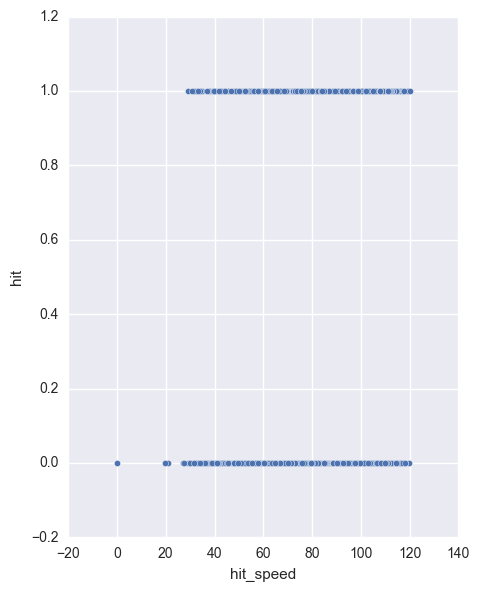

In [43]:
#just to get a feel, lets plot ball speed against this outcome
sns.pairplot(newdf2,x_vars=["hit_speed"],y_vars=["hit"], size = 6, aspect=0.8)

In [46]:
#create a logistic regression model with all of the features available to us
logreg = LogisticRegression(C=1e9)
features = ['start_speed','hit_speed','hc_x','hc_y','hit_distance_sc','hit_angle']
X = newdf2[features]
y = newdf2.hit

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.15)
print X_train.shape
print X_test.shape

(6117, 6)
(34665, 6)


In [47]:
#train model on the training set
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [48]:
#pridct on training set
train_pred = logreg.predict(X_train)
print "Training set RMSE:", np.sqrt(metrics.accuracy_score(train_pred,y_train))

#predict on test set
test_pred = logreg.predict(X_test)
print "Test set RMSE:", np.sqrt(metrics.accuracy_score(test_pred,y_test))

Training set RMSE: 0.85694043088
Test set RMSE: 0.861889216651


In [49]:
#explore coefficients
print logreg.coef_
newdf2.head()

[[-0.00119342  0.01592772 -0.00085803 -0.04181976 -0.00352181 -0.02985163]]


,start_speed,home_team,hit_speed,hc_x,hc_y,hit_distance_sc,hit_angle,hit
player_name,,,,,,,,
Bartolo Colon,87.08,MIA,108.36,63.37,111.79,275.70,9.76,1
Bartolo Colon,90.72,NYM,73.99,115.74,151.07,144.31,-11.50,0
Bartolo Colon,90.73,SD,96.89,27.30,78.26,364.74,34.86,1
Bartolo Colon,94.19,NYM,84.32,99.50,170.40,5.29,-43.53,0
David Ortiz,52.00,SF,97.32,138.04,150.21,90.30,-26.24,0


In [50]:
#
test_probs = logreg.predict_proba(X_test)[:,1]



#get roc curves

def plot_roc(test_probs, y_test, titlestr):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_test = y_test
    y_score = test_probs

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(titlestr)
    plt.legend(loc="lower right")
    plt.show()   

In [51]:
from sklearn.metrics import roc_curve, auc

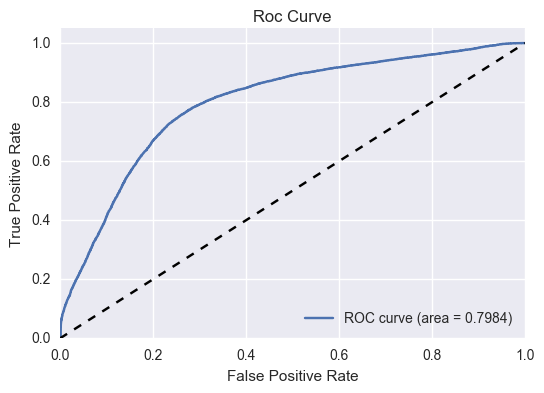

In [52]:
plot_roc(test_probs,y_test,'Roc Curve')

In [53]:
predict_proba = logreg.predict_proba(X)
print "predict_proba shape:",predict_proba.shape
print "df2 shape:", newdf2.shape

predict_proba shape: (40782L, 2L)
df2 shape: (40782, 8)


In [54]:
predict_proba[:,1]

array([ 0.43534424,  0.19748339,  0.48080489, ...,  0.85593542,
        0.81648451,  0.59060317])

In [55]:
newdf2['hit_proba'] = predict_proba[:,1]
newdf2.head(20)

,start_speed,home_team,hit_speed,hc_x,hc_y,hit_distance_sc,hit_angle,hit,hit_proba
player_name,,,,,,,,,
Bartolo Colon,87.08,MIA,108.36,63.37,111.79,275.70,9.76,1,0.435344
Bartolo Colon,90.72,NYM,73.99,115.74,151.07,144.31,-11.50,0,0.197483
Bartolo Colon,90.73,SD,96.89,27.30,78.26,364.74,34.86,1,0.480805
Bartolo Colon,94.19,NYM,84.32,99.50,170.40,5.29,-43.53,0,0.356544
David Ortiz,52.00,SF,97.32,138.04,150.21,90.30,-26.24,0,0.416480
David Ortiz,80.00,BOS,105.90,128.42,48.15,359.96,16.20,0,0.861260
David Ortiz,145.00,BOS,108.62,221.82,77.14,299.14,16.92,1,0.666356
David Ortiz,33.00,BOS,70.96,153.29,159.04,130.13,-3.74,0,0.126894
David Ortiz,95.00,BOS,89.61,168.52,93.93,244.08,14.66,1,0.513394


In [71]:
newdf2['hit_proba_class'] = np.where(newdf2.hit_proba >= 0.5,1,0) 
newdf2['model_correct'] = np.where(newdf2.hit == newdf2.hit_proba_class,1,0)
newdf2.head()

,start_speed,home_team,hit_speed,hc_x,hc_y,hit_distance_sc,hit_angle,hit,hit_proba,hit_proba_cut,inv_x,inv_y,angle_bucket,hit_speed_bucket,hit_proba_class,model_correct
player_name,,,,,,,,,,,,,,,,
Bartolo Colon,87.08,MIA,108.36,63.37,111.79,275.70,9.76,1,0.435344,"(0.375, 0.5]",-63.37,-111.79,"(-4.55, 11.475]","(99.62, 120.14]",0,0
Bartolo Colon,90.72,NYM,73.99,115.74,151.07,144.31,-11.50,0,0.197483,"(0.125, 0.25]",-115.74,-151.07,"[-85.38, -4.55]","[0, 81.06]",0,1
Bartolo Colon,90.73,SD,96.89,27.30,78.26,364.74,34.86,1,0.480805,"(0.375, 0.5]",-27.30,-78.26,"(27.51, 89.53]","(91.765, 99.62]",0,0
Bartolo Colon,94.19,NYM,84.32,99.50,170.40,5.29,-43.53,0,0.356544,"(0.25, 0.375]",-99.50,-170.40,"[-85.38, -4.55]","(81.06, 91.765]",0,1
David Ortiz,52.00,SF,97.32,138.04,150.21,90.30,-26.24,0,0.416480,"(0.375, 0.5]",-138.04,-150.21,"[-85.38, -4.55]","(91.765, 99.62]",0,1


In [59]:
#adding in a bucket for hit probability
newdf2['hit_proba_cut'] = pd.cut(newdf2.hit_proba, 8)
# inverting the X and Y columns to graph like a baseball diamond
newdf2['inv_x'] = newdf2.hc_x*-1
newdf2['inv_y'] = newdf2.hc_y*-1

In [64]:
newdf2['angle_bucket'] = pd.qcut(newdf2.hit_angle,4)
newdf2['hit_speed_bucket'] = pd.qcut(newdf2.hit_speed,4)
newdf2.head()

,start_speed,home_team,hit_speed,hc_x,hc_y,hit_distance_sc,hit_angle,hit,hit_proba,hit_proba_cut,inv_x,inv_y,angle_bucket,hit_speed_bucket
player_name,,,,,,,,,,,,,,
Bartolo Colon,87.08,MIA,108.36,63.37,111.79,275.70,9.76,1,0.435344,"(0.375, 0.5]",-63.37,-111.79,"(-4.55, 11.475]","(99.62, 120.14]"
Bartolo Colon,90.72,NYM,73.99,115.74,151.07,144.31,-11.50,0,0.197483,"(0.125, 0.25]",-115.74,-151.07,"[-85.38, -4.55]","[0, 81.06]"
Bartolo Colon,90.73,SD,96.89,27.30,78.26,364.74,34.86,1,0.480805,"(0.375, 0.5]",-27.30,-78.26,"(27.51, 89.53]","(91.765, 99.62]"
Bartolo Colon,94.19,NYM,84.32,99.50,170.40,5.29,-43.53,0,0.356544,"(0.25, 0.375]",-99.50,-170.40,"[-85.38, -4.55]","(81.06, 91.765]"
David Ortiz,52.00,SF,97.32,138.04,150.21,90.30,-26.24,0,0.416480,"(0.375, 0.5]",-138.04,-150.21,"[-85.38, -4.55]","(91.765, 99.62]"


In [60]:
sns.color_palette("Blues")

[(0.85840831293779263, 0.91344867874594293, 0.96456747616038607),
 (0.73094965079251462, 0.83947713375091548, 0.92132257293252384),
 (0.53568628967977039, 0.7460822911823497, 0.86425221877939562),
 (0.32628989885835086, 0.61862362903707169, 0.80279893524506507),
 (0.16696656059985066, 0.48069205132185244, 0.72915034294128422),
 (0.044059979477349451, 0.33388697645243476, 0.62445215617909156)]

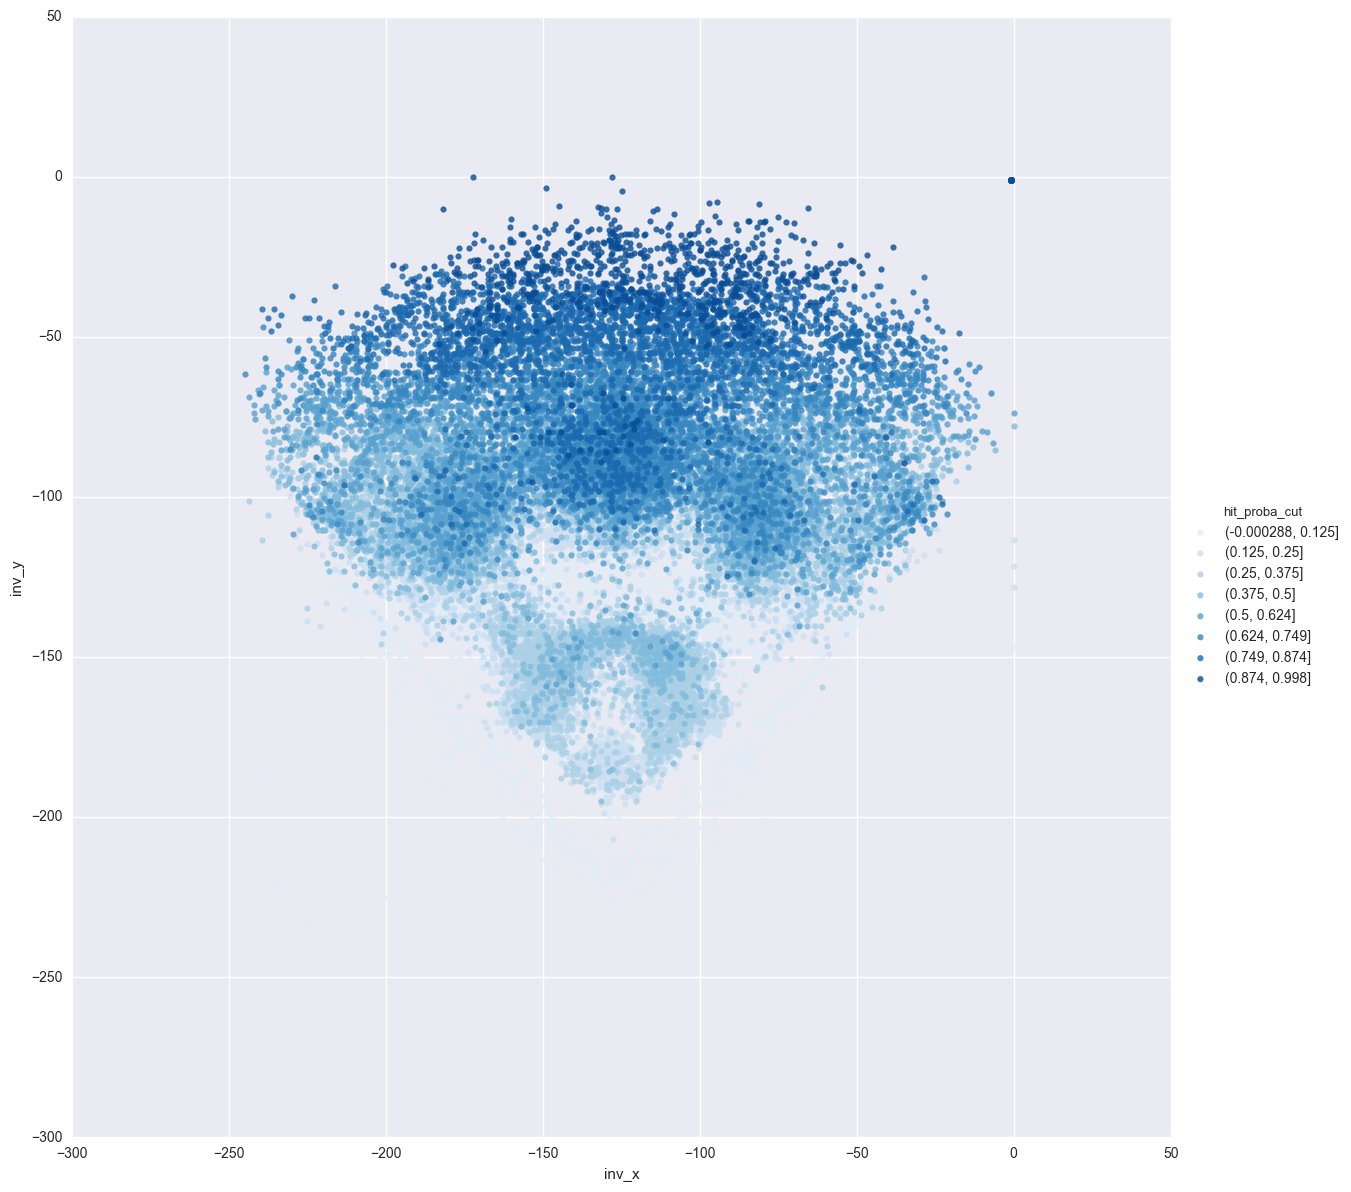

In [61]:
sns.lmplot('inv_x', 'inv_y', data=newdf2, hue = 'hit_proba_cut', size =12, fit_reg = False, palette="Blues")

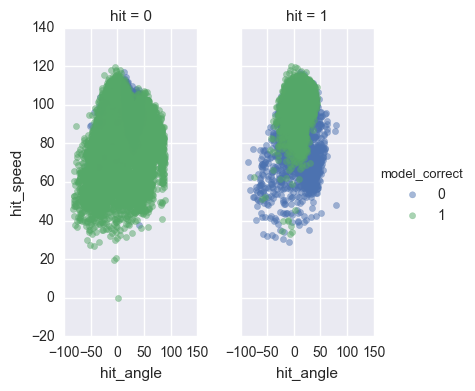

In [80]:
#see how well the model predicted hits versus outs
chart =sns.FacetGrid(newdf2, col='hit', hue = 'model_correct', size = 4, aspect = 0.5)
chart.map(plt.scatter,'hit_angle','hit_speed', alpha= .5)
chart.add_legend()